In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# This line is needed to use CUDA on my linux box
os.environ['XLA_FLAGS']='--xla_gpu_cuda_data_dir=/usr/lib/cuda'

2023-10-01 20:48:32.045043: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 20:48:32.064710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 20:48:32.348289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load and preprocess MNIST
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
# Define 1 layer model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-10-01 20:49:49.941756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 20:49:49.957844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 20:49:49.957919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
# Create callback for saving model
checkpoint = ModelCheckpoint('../models/cnn_1_layer_mnist.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the 1 layer MNIST model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(test_images, test_labels),
                    callbacks=[checkpoint])

Epoch 1/10


2023-10-01 20:50:08.144809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-10-01 20:50:08.184320: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-10-01 20:50:08.184331: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2023-10-01 20:50:08.184364: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-01 20:50:08.207017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-01 20:50:08.208529: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f54645a835

59/59 [==============================] - ETA: 0s - loss: 0.5252 - accuracy: 0.8456
Epoch 1: val_accuracy improved from -inf to 0.95130, saving model to ../models/cnn_1_layer_mnist.h5
59/59 [==============================] - 1s 8ms/step - loss: 0.5252 - accuracy: 0.8456 - val_loss: 0.1656 - val_accuracy: 0.9513
Epoch 2/10
50/59 [========================>.....] - ETA: 0s - loss: 0.1836 - accuracy: 0.9476

/home/robert/Dev/cs5870-assignment-1/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.95130 to 0.97310, saving model to ../models/cnn_1_layer_mnist.h5
59/59 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.9485 - val_loss: 0.0942 - val_accuracy: 0.9731
Epoch 3/10
54/59 [==========================>...] - ETA: 0s - loss: 0.1227 - accuracy: 0.9651
Epoch 3: val_accuracy improved from 0.97310 to 0.97730, saving model to ../models/cnn_1_layer_mnist.h5
59/59 [==============================] - 0s 6ms/step - loss: 0.1224 - accuracy: 0.9653 - val_loss: 0.0728 - val_accuracy: 0.9773
Epoch 4/10
58/59 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9729
Epoch 4: val_accuracy improved from 0.97730 to 0.98070, saving model to ../models/cnn_1_layer_mnist.h5
59/59 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.0616 - val_accuracy: 0.9807
Epoch 5/10
51/59 [========================>.....] - ETA: 0s - loss: 0.0776 - accuracy: 0.9768
Epoch 5: val_accuracy

In [5]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 620us/step - loss: 0.0426 - accuracy: 0.9842
Test Accuracy: 0.9842000007629395


## Visualization: MNIST Training History

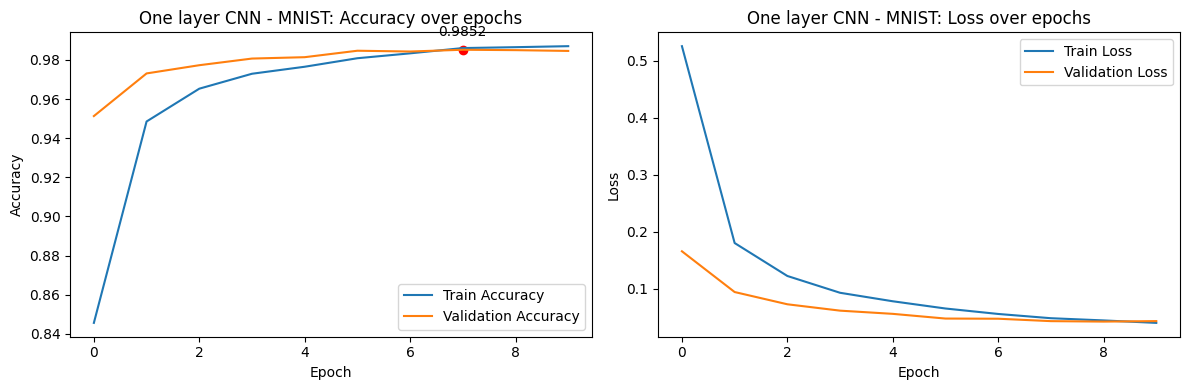

In [7]:
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Annotate the maximum validation accuracy
max_val_acc = max(history.history['val_accuracy'])
max_val_acc_idx = history.history['val_accuracy'].index(max_val_acc)
plt.scatter(max_val_acc_idx, max_val_acc, color='red') # Highlight the max value with a red dot
plt.annotate(f'{max_val_acc:.4f}', (max_val_acc_idx, max_val_acc), textcoords="offset points", xytext=(0,10), ha='center') # Annotate the value

plt.title('One layer CNN - MNIST: Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('One layer CNN - MNIST: Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Load and preprocess CIFAR-10
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess data
cifar10_train_images = train_images.astype('float32') / 255
cifar10_test_images = test_images.astype('float32') / 255

cifar10_train_labels = to_categorical(train_labels)
cifar10_test_labels = to_categorical(test_labels)

In [20]:
# Define same model architecture for CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4196618 (16.01 MB)
Trainable params: 4196618 (16.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Create callback for saving model
checkpoint = ModelCheckpoint('../models/cnn_1_layer_cifar10.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the 1 layer CIFAR-10 model
cifar10_history = model.fit(cifar10_train_images, cifar10_train_labels,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(cifar10_test_images, cifar10_test_labels),
                    callbacks=[checkpoint])

Epoch 1/50
47/49 [===========================>..] - ETA: 0s - loss: 2.2656 - accuracy: 0.1817
Epoch 1: val_accuracy improved from -inf to 0.33120, saving model to ../models/cnn_1_layer_cifar10.h5
49/49 [==============================] - 1s 11ms/step - loss: 2.2566 - accuracy: 0.1843 - val_loss: 1.9258 - val_accuracy: 0.3312
Epoch 2/50
46/49 [===========================>..] - ETA: 0s - loss: 1.8895 - accuracy: 0.3065
Epoch 2: val_accuracy improved from 0.33120 to 0.45900, saving model to ../models/cnn_1_layer_cifar10.h5
49/49 [==============================] - 0s 9ms/step - loss: 1.8841 - accuracy: 0.3091 - val_loss: 1.6136 - val_accuracy: 0.4590
Epoch 3/50
45/49 [==========================>...] - ETA: 0s - loss: 1.6895 - accuracy: 0.3825
Epoch 3: val_accuracy improved from 0.45900 to 0.49720, saving model to ../models/cnn_1_layer_cifar10.h5
49/49 [==============================] - 0s 7ms/step - loss: 1.6844 - accuracy: 0.3842 - val_loss: 1.4772 - val_accuracy: 0.4972
Epoch 4/50
49/49 [

In [22]:
# Model evaluation
test_loss, test_acc = model.evaluate(cifar10_test_images, cifar10_test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.6292
Test Accuracy: 0.6291999816894531


## Visualization: CIFAR-10 Training History

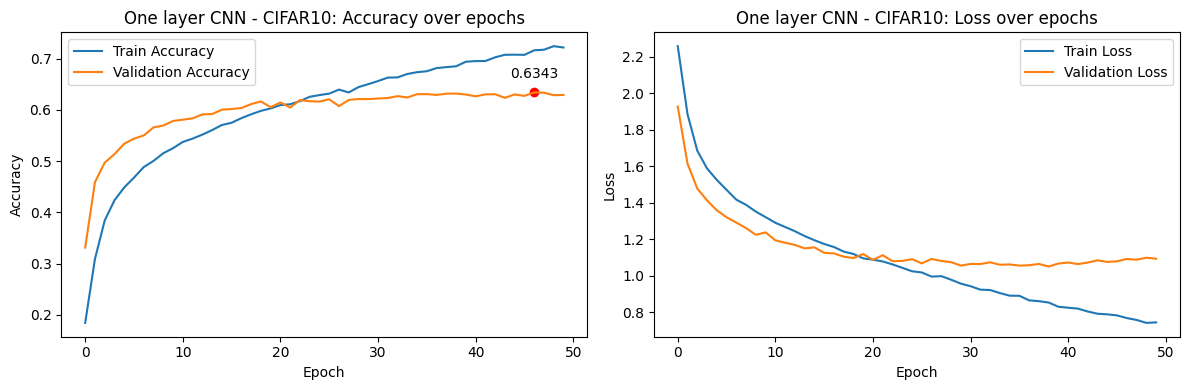

In [23]:
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(cifar10_history.history['accuracy'], label='Train Accuracy')
plt.plot(cifar10_history.history['val_accuracy'], label='Validation Accuracy')

# Annotate the maximum validation accuracy
max_val_acc = max(cifar10_history.history['val_accuracy'])
max_val_acc_idx = cifar10_history.history['val_accuracy'].index(max_val_acc)
plt.scatter(max_val_acc_idx, max_val_acc, color='red') # Highlight the max value with a red dot
plt.annotate(f'{max_val_acc:.4f}', (max_val_acc_idx, max_val_acc), textcoords="offset points", xytext=(0,10), ha='center') # Annotate the value

plt.title('One layer CNN - CIFAR10: Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(cifar10_history.history['loss'], label='Train Loss')
plt.plot(cifar10_history.history['val_loss'], label='Validation Loss')
plt.title('One layer CNN - CIFAR10: Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Load and process Tiny Imagenet dataset

In [28]:
# rescale images and set aside 20% of data for validation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),  # Resize to the actual image size
    batch_size=128,
    class_mode='categorical',
    subset='training'  # Specify this is for training data
)

# Validation generator: Similarly, for validation
val_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical',
    subset='validation'  # Specify this is for validation data
)

Found 80000 images belonging to 200 classes.
Found 20000 images belonging to 200 classes.


In [26]:
# Define same model architecture for CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               25800     
                                                                 
Total params: 16804040 (64.10 MB)
Trainable params: 16804040 (64.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Create callback for saving model
checkpoint = ModelCheckpoint('../models/cnn_1_layer_tiny_imagenet.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the 1 layer Tiny Imagenet model
imagenet_history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint]
)

Epoch 1/20
624/625 [============================>.] - ETA: 0s - loss: 5.2987 - accuracy: 0.0051
Epoch 1: val_accuracy improved from -inf to 0.00500, saving model to ../models/cnn_1_layer_tiny_imagenet.h5
625/625 [==============================] - 9s 14ms/step - loss: 5.2987 - accuracy: 0.0051 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 2/20
621/625 [============================>.] - ETA: 0s - loss: 5.2987 - accuracy: 0.0048
Epoch 2: val_accuracy did not improve from 0.00500
625/625 [==============================] - 9s 14ms/step - loss: 5.2987 - accuracy: 0.0049 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 3/20
623/625 [============================>.] - ETA: 0s - loss: 5.2986 - accuracy: 0.0051
Epoch 3: val_accuracy did not improve from 0.00500
625/625 [==============================] - 8s 13ms/step - loss: 5.2986 - accuracy: 0.0050 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 4/20
623/625 [============================>.] - ETA: 0s - loss: 5.2986 - accuracy: 0.0046
Epoch 4: v

In [30]:
# Model evaluation using the validation generator
val_loss, val_acc = model.evaluate(val_gen, steps=val_gen.samples // val_gen.batch_size)
print("Validation Accuracy:", val_acc)

156/156 [==============================] - 2s 11ms/step - loss: 5.2983 - accuracy: 0.0050
Validation Accuracy: 0.005008012987673283


## Visualization: Tiny Imagenet training history on simple CNN architecture

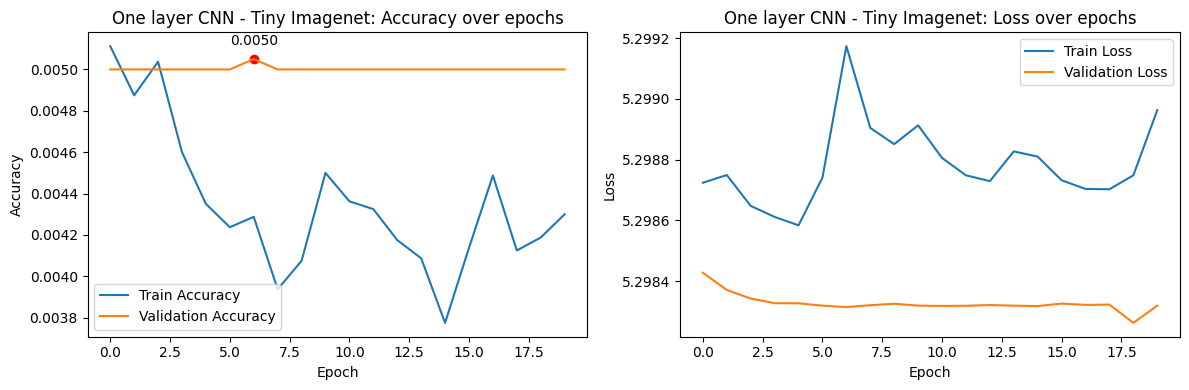

In [31]:
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(imagenet_history.history['val_accuracy'], label='Validation Accuracy')

# Annotate the maximum validation accuracy
max_val_acc = max(imagenet_history.history['val_accuracy'])
max_val_acc_idx = imagenet_history.history['val_accuracy'].index(max_val_acc)
plt.scatter(max_val_acc_idx, max_val_acc, color='red') # Highlight the max value with a red dot
plt.annotate(f'{max_val_acc:.4f}', (max_val_acc_idx, max_val_acc), textcoords="offset points", xytext=(0,10), ha='center') # Annotate the value

plt.title('One layer CNN - Tiny Imagenet: Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(imagenet_history.history['loss'], label='Train Loss')
plt.plot(imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('One layer CNN - Tiny Imagenet: Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Simple architecture underfit Tiny Imagenet so let's try a slightly modifeid version of Lenet-5's architecture and see how it does

In [38]:
# Define modified LeNet-5 architecture for Tiny ImageNet
model = Sequential([
    # C1: Convolutional layer with 6 feature maps and 5x5 filters.
    Conv2D(6, (5, 5), activation='relu', padding='valid', input_shape=(64, 64, 3)),
    
    # S2: Max pooling layer.
    MaxPooling2D(pool_size=(2, 2)),
    
    # C3: Convolutional layer with 16 feature maps and 5x5 filters.
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    
    # S4: Max pooling layer.
    MaxPooling2D(pool_size=(2, 2)),
    
    # C5: Convolutional layer with 120 feature maps and 5x5 filters.
    Conv2D(120, (5, 5), activation='relu', padding='valid'),
    
    # Flatten layer to convert 2D data to 1D for fully connected layers.
    Flatten(),
    
    # F6: Fully connected layer with 84 units.
    Dense(84, activation='relu'),
    
    # Output layer for 200 classes of Tiny ImageNet.
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 9720)             

In [39]:
# Create callback for saving model
checkpoint = ModelCheckpoint('../models/cnn_lenet5_tiny_imagenet.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the 1 layer Tiny Imagenet model
imagenet_history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint]
)

Epoch 1/20
622/625 [============================>.] - ETA: 0s - loss: 5.0403 - accuracy: 0.0219
Epoch 1: val_accuracy improved from -inf to 0.05460, saving model to ../models/cnn_lenet5_tiny_imagenet.h5
625/625 [==============================] - 9s 13ms/step - loss: 5.0388 - accuracy: 0.0220 - val_loss: 4.7068 - val_accuracy: 0.0546
Epoch 2/20
624/625 [============================>.] - ETA: 0s - loss: 4.5194 - accuracy: 0.0730
Epoch 2: val_accuracy improved from 0.05460 to 0.09020, saving model to ../models/cnn_lenet5_tiny_imagenet.h5
625/625 [==============================] - 9s 14ms/step - loss: 4.5191 - accuracy: 0.0730 - val_loss: 4.3698 - val_accuracy: 0.0902
Epoch 3/20
623/625 [============================>.] - ETA: 0s - loss: 4.2230 - accuracy: 0.1100
Epoch 3: val_accuracy improved from 0.09020 to 0.11635, saving model to ../models/cnn_lenet5_tiny_imagenet.h5
625/625 [==============================] - 8s 13ms/step - loss: 4.2229 - accuracy: 0.1101 - val_loss: 4.1708 - val_accura

In [40]:
# Model evaluation using the validation generator
val_loss, val_acc = model.evaluate(val_gen, steps=val_gen.samples // val_gen.batch_size)
print("Validation Accuracy:", val_acc)

156/156 [==============================] - 2s 11ms/step - loss: 4.4224 - accuracy: 0.1528
Validation Accuracy: 0.1527944654226303


## Visualization: Training history for Tiny Imagenet on Lenet-5 architecture

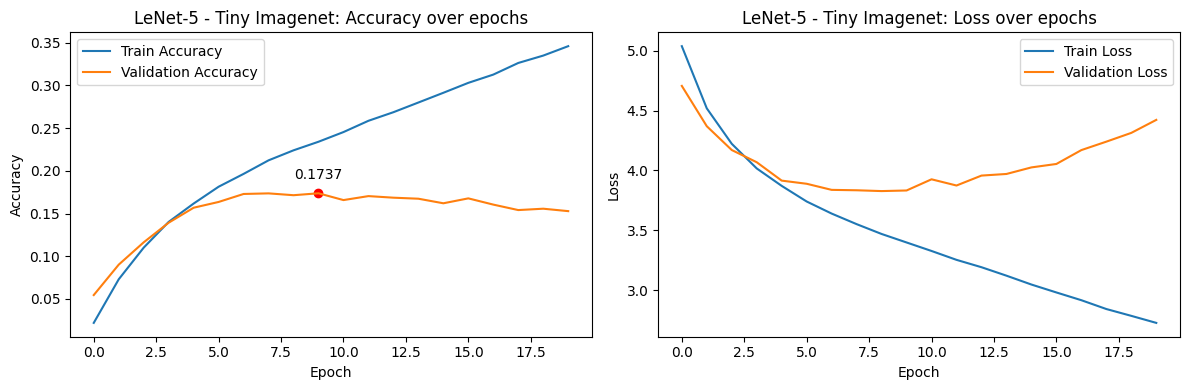

: 

In [41]:
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(imagenet_history.history['val_accuracy'], label='Validation Accuracy')

# Annotate the maximum validation accuracy
max_val_acc = max(imagenet_history.history['val_accuracy'])
max_val_acc_idx = imagenet_history.history['val_accuracy'].index(max_val_acc)
plt.scatter(max_val_acc_idx, max_val_acc, color='red') # Highlight the max value with a red dot
plt.annotate(f'{max_val_acc:.4f}', (max_val_acc_idx, max_val_acc), textcoords="offset points", xytext=(0,10), ha='center') # Annotate the value

plt.title('LeNet-5 - Tiny Imagenet: Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(imagenet_history.history['loss'], label='Train Loss')
plt.plot(imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('LeNet-5 - Tiny Imagenet: Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()